In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
# reflect the tables
Measurement = Base.classes.measurement
Station = Base.classes.station


In [11]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

print(recent_date)

2017-08-23


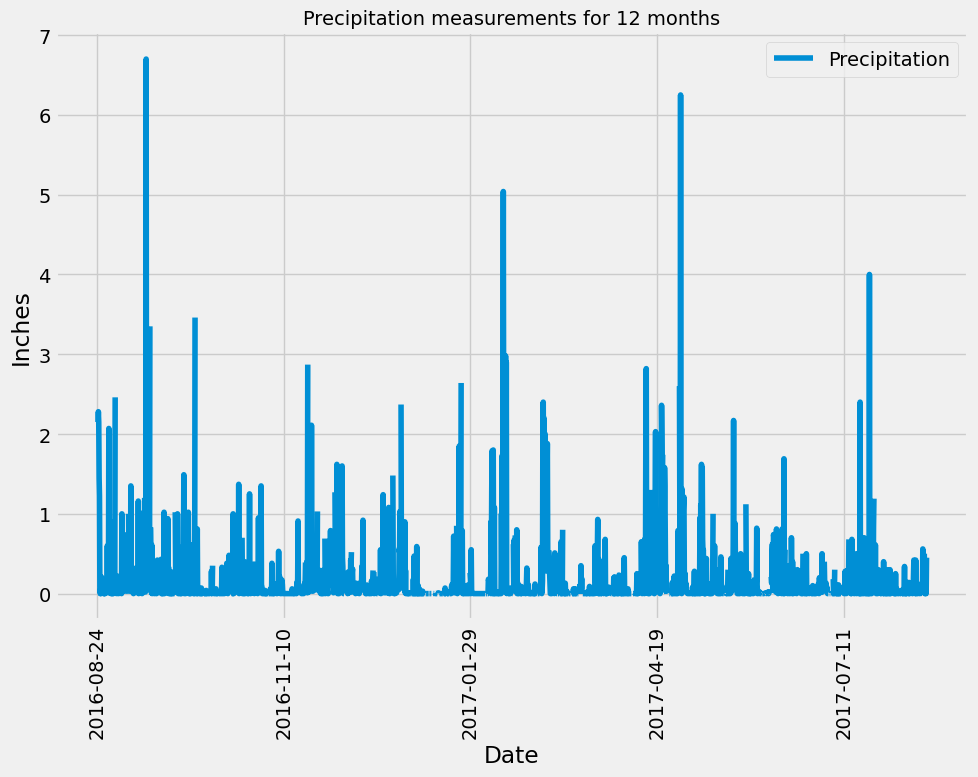

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# Starting from the most recent data point in the database. 
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
recent_date_format = datetime.strptime(recent_date, "%Y-%m-%d")

# Calculate the date one year from the last date in data set.
one_year_date = recent_date_format - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_data, columns =["Date", "Precipitation"]).set_index("Date")

# Sort the dataframe by date
precip_df.sort_values(by=["Date"], inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(ylabel="Inches", grid =True, figsize=(10,8))
plt.xticks(rotation=90)
plt.legend(loc="best")
plt.title("Precipitation measurements for 12 months", size=14)
plt.tight_layout()
plt.show()


In [80]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [39]:
# Design a query to calculate the total number of stations in the dataset
station = session.query(func.count(Station.name)).all()
print (station)

[(9,)]


In [41]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station).label("count"))\
    .group_by(Measurement.station)\
    .order_by(desc("count")).all()


for station, count in active_stations:
    print(station, count)                        
                              

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_active = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
              .filter(Measurement.station == active_stations[0] [0]).all()
print (temp_active)

[(54.0, 85.0, 71.66378066378067)]


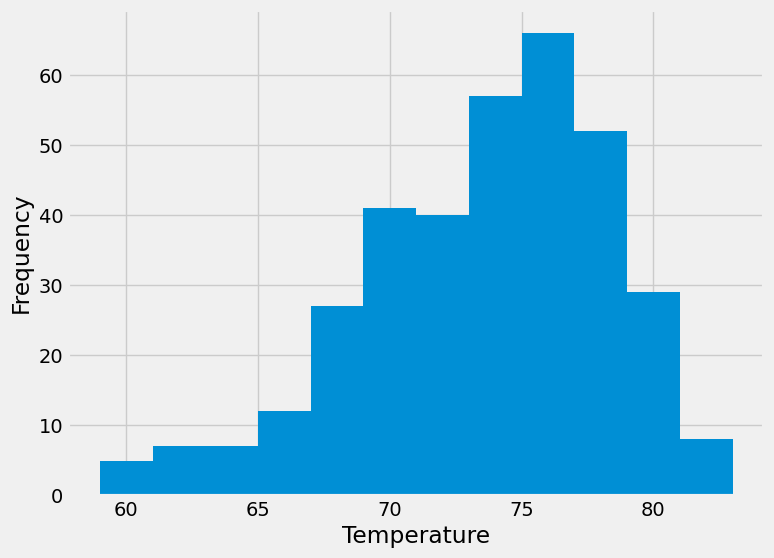

In [49]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_graph = session.query(Measurement.tobs).filter(Measurement.station == active_stations[0] [0])\
            .filter(Measurement.date >= one_year_date).all()
 
#Store extracted temperature in a new list to plot graph
temps = [t[0] for t in temp_graph]

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(temps, bins =12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close Session

In [51]:
# Close Session
session.close()